In [1]:
import os
import deepchem as dc
import numpy as np
from tensorflow import keras
from tensorflow_addons.optimizers import AdamW

In [2]:
featurizer = dc.feat.CircularFingerprint()

In [3]:
model = keras.models.load_model('/Users/vicent/Documents/Consulting/AIPharma/Python_Code/DDI/drug_interaction/model', custom_objects={'AdamW': AdamW})

2022-06-30 12:38:27.066822: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
def invoke_model(drugs: np.array) -> [float]:
    x = np.transpose(drugs)
    x = x.reshape(1, 64, 64, 1)
    scores = model.predict(x) * 100
    return scores

In [5]:
def run_inference(smile1, smile2):
    drug1 = featurizer(smile1)
    drug2 = featurizer(smile2)
    drugs = np.array([np.transpose(drug1), np.transpose(drug2)])
    return invoke_model(drugs)

In [6]:
pwd = '/Users/vicent/Documents/Consulting/AIPharma/cellvera_drugbank_CSV/'

In [7]:
import pandas as pd
df_drugs = pd.read_csv(pwd+'drugs2.csv', usecols=['id','drugbank_id', 'name', 'moldb_smiles'], dtype={'moldb_smiles':'string'})

In [8]:
drugs = df_drugs['moldb_smiles']
drugs = drugs.dropna()
X_drugs = drugs.to_numpy()

In [9]:
res = run_inference(X_drugs[0], X_drugs[1])

In [10]:
res[0][8]

0.04339724

In [11]:
favi = ['NC(=O)C1=NC(F)=CN=C1O']
favi = ['[H][C@@]12OC\C3=C/C=C/[C@H](C)[C@H](O[C@H]4C[C@H](OC)[C@@H](O[C@H]5C[C@H](OC)[C@@H](O)[C@H](C)O5)[C@H](C)O4)\C(C)=C\C[C@]4([H])C[C@@]([H])(C[C@]5(CC[C@H](C)[C@]([H])(O5)C(C)C)O4)OC(=O)[C@]([H])(C=C(C)[C@H]1O)[C@@]23O.[H][C@@]12OC\C3=C/C=C/[C@H](C)[C@H](O[C@H]4C[C@H](OC)[C@@H](O[C@H]5C[C@H](OC)[C@@H](O)[C@H](C)O5)[C@H](C)O4)\C(C)=C\C[C@]4([H])C[C@@]([H])(C[C@]5(CC[C@H](C)[C@]([H])(O5)[C@@H](C)CC)O4)OC(=O)[C@]([H])(C=C(C)[C@H]1O)[C@@]23O']

In [12]:
ypred = []
drugs_list = []
for item in X_drugs:
    try:
        res = run_inference(favi, item)
        ypred.append(res)
        if res[0][8] > 1:
            print([res[0][8], res[0][73]])
            drugs_list.append(item)
    except:
        print('RDKIT issue')
    

RDKit ERROR: [12:38:49] Explicit valence for atom # 0 N, 4, is greater than permitted
[12:38:49] Explicit valence for atom # 0 N, 4, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
/var/folders/cw/5_ch96k50gq9g9b990wykg0m0000gn/T/ipykernel_77805/26363472.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  drugs = np.array([np.transpose(drug1), np.transpose(drug2)])


RDKIT issue


RDKit ERROR: [12:38:49] Explicit valence for atom # 0 N, 4, is greater than permitted
[12:38:49] Explicit valence for atom # 0 N, 4, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue


RDKit ERROR: [12:39:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[12:39:09] Explicit valence for atom # 0 N, 4, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue
[1.1723638, 4.745929]


RDKit ERROR: [12:39:49] Explicit valence for atom # 13 Cl, 5, is greater than permitted
[12:39:49] Explicit valence for atom # 13 Cl, 5, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue


RDKit ERROR: [12:39:52] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
[12:39:52] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
RDKit ERROR: [12:39:52] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]'
[12:39:52] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/

RDKIT issue


RDKit ERROR: [12:40:24] Explicit valence for atom # 19 O, 3, is greater than permitted
[12:40:24] Explicit valence for atom # 19 O, 3, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue
[1.0170301, 1.4616653]


RDKit ERROR: [12:41:07] Explicit valence for atom # 6 N, 4, is greater than permitted
[12:41:07] Explicit valence for atom # 6 N, 4, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue
[1.2259787, 1.6729362]


RDKit ERROR: [12:41:38] Explicit valence for atom # 0 O, 3, is greater than permitted
[12:41:38] Explicit valence for atom # 0 O, 3, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue


RDKit ERROR: [12:41:44] Explicit valence for atom # 3 N, 4, is greater than permitted
[12:41:44] Explicit valence for atom # 3 N, 4, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue


RDKit ERROR: [12:41:54] Explicit valence for atom # 4 F, 2, is greater than permitted
[12:41:54] Explicit valence for atom # 4 F, 2, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue
[2.8022099, 14.488079]


RDKit ERROR: [12:44:28] Explicit valence for atom # 13 Be, 3, is greater than permitted
[12:44:28] Explicit valence for atom # 13 Be, 3, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue
[1.4673188, 6.521221]
[1.0149716, 9.066284]
[1.0006243, 3.2960575]


RDKit ERROR: [12:45:15] Explicit valence for atom # 84 N, 4, is greater than permitted
[12:45:15] Explicit valence for atom # 84 N, 4, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue


RDKit ERROR: [12:45:36] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[12:45:36] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
RDKit ERROR: [12:45:36] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'
Failed to featurize datapoint 0, None. Appending empty array
[12:45:36] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\

RDKIT issue
[1.1549768, 2.1515296]


RDKit ERROR: [12:46:10] Explicit valence for atom # 1 Cl, 4, is greater than permitted
[12:46:10] Explicit valence for atom # 1 Cl, 4, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue
[1.5164696, 0.53604037]
[1.3305658, 5.605956]


RDKit ERROR: [12:46:38] Explicit valence for atom # 0 N, 4, is greater than permitted
[12:46:38] Explicit valence for atom # 0 N, 4, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue
[1.2786361, 20.858978]


RDKit ERROR: [12:47:27] Explicit valence for atom # 5 K, 2, is greater than permitted
[12:47:27] Explicit valence for atom # 5 K, 2, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)


RDKIT issue
[1.3382834, 2.3790646]
[1.0880162, 3.3986888]
[2.5897584, 8.550577]


RDKit WARNING: [12:48:11] WARNING: not removing hydrogen atom without neighbors
[12:48:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:48:11] WARNING: not removing hydrogen atom without neighbors
[12:48:11] WARNING: not removing hydrogen atom without neighbors


[1.8656608, 23.157778]
[1.3979424, 8.126604]


In [13]:
drugs_list

['COC1=C(C=C(Cl)C=C1)C(=O)NCCC1=CC=C(C=C1)S(=O)(=O)NC(=O)NC1CCCCC1',
 'O\\N=C(/N)N1CCC(CC1)CNC(=O)[C@@H]1CC[C@H]2CN(CC(=O)N12)S(=O)(=O)CC1=CC=CC=C1',
 '[Ru+3].[N-]1C=CN=C1.C1=CC=C(N=C1)C1=CC=CC=N1.C1=CC=C(N=C1)C1=CC=CC=N1',
 'CN1C(=O)C=C(N2CCC[C@@H](N)C2)N(CC2=C(C=CC=C2)C#N)C1=O',
 '[H][C@](CC)(C1=CC=CC=C1)C1=C(O)C2=C(OC1=O)C=C(OC)C=C2',
 'CC[C@H](C)[C@H](NC(=O)[C@H](CC(O)=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCCCN)NC(=O)[C@H](CCCNC(N)=N)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CN=CN1)NC(=O)[C@H](C)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CC(O)=O)NC(=O)[C@H](C)NC(=O)[C@H](CCCCN)NC(=O)[C@@H](NC(=O)[C@H](CCSC)NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](CCCNC(N)=N)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC1=CN=CN1)NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(O)=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CO)NC(=O)[C@@H](NC(=O)[C@@H

In [14]:
df_sol = df_drugs.loc[df_drugs['moldb_smiles'].isin(drugs_list)]

In [15]:
df_sol

,id,drugbank_id,name,moldb_smiles
998,1016,DB01016,Glyburide,COC1=C(C=C(Cl)C=C1)C(=O)NCCC1=CC=C(C=C1)S(=O)(...
2569,2723,DB02723,4-Oxo-2-Phenylmethanesulfonyl-Octahydro-Pyrrol...,O\N=C(/N)N1CCC(CC1)CNC(=O)[C@@H]1CC[C@H]2CN(CC...
3640,3871,DB03871,"lambda-bis(2,2'-bipyridine)imidazole ruthenium...",[Ru+3].[N-]1C=CN=C1.C1=CC=C(N=C1)C1=CC=CC=N1.C...
5487,6204,DB06203,Alogliptin,CN1C(=O)C=C(N2CCC[C@@H](N)C2)N(CC2=C(C=CC=C2)C...
7708,8669,DB08663,4-HYDROXY-7-METHOXY-3-(1-PHENYL-PROPYL)-CHROME...,[H][C@](CC)(C1=CC=CC=C1)C1=C(O)C2=C(OC1=O)C=C(...
8079,9088,DB09067,Corticorelin ovine triflutate,CC[C@H](C)[C@H](NC(=O)[C@H](CC(O)=O)NC(=O)[C@H...
8206,9223,DB09199,Netoglitazone,FC1=C(COC2=CC=C3C=C(CC4SC(=O)NC4=O)C=CC3=C2)C=...
10016,12074,DB11992,Omarigliptin,CS(=O)(=O)N1C=C2CN(CC2=N1)[C@H]1CO[C@@H]([C@@H...
10575,12655,DB12573,LY-2452473,CC(C)OC(=O)N[C@@H]1CC2=C(C1)C1=CC(=CC=C1N2CC1=...
10624,12707,DB12625,Evogliptin,CC(C)(C)OC[C@H]1N(CCNC1=O)C(=O)C[C@H](N)CC1=CC...


In [16]:
import numpy as np
from tdc.multi_pred import DDI
data = DDI(name = 'DrugBank')
split = data.get_split()

Found local copy...
Loading...
Done!


In [17]:
data

In [18]:
K = split['train']

In [19]:
K_syn = K.loc[K['Y'] == 8]

In [20]:
K_syn

,Drug1_ID,Drug1,Drug2_ID,Drug2,Y
6562,DB00230,CC(C)C[C@H](CN)CC(O)=O,DB01100,FC1=CC=C(C=C1)C(CCCN1CCC(CC1)N1C(=O)NC2=CC=CC=...,8
6563,DB00230,CC(C)C[C@H](CN)CC(O)=O,DB00458,CN(C)CCCN1C2=CC=CC=C2CCC2=CC=CC=C12,8
6564,DB01037,C[C@H](CC1=CC=CC=C1)N(C)CC#C,DB00295,[H][C@@]12OC3=C(O)C=CC4=C3[C@@]11CCN(C)[C@]([H...,8
6565,DB00230,CC(C)C[C@H](CN)CC(O)=O,DB01588,ClC1=CC2=C(C=C1)N(CC1CC1)C(=O)CN=C2C1=CC=CC=C1,8
6566,DB00230,CC(C)C[C@H](CN)CC(O)=O,DB01587,CN1C2=C(C=C(Cl)C=C2)C2(OC(C)=CC(=O)N2CC1=O)C1=...,8
...,...,...,...,...,...
6744,DB09270,COC1=C(OC)C(=O)C(C\C=C(/C)CC\C=C(/C)CC\C=C(/C)...,DB01261,N[C@@H](CC(=O)N1CCN2C(C1)=NN=C2C(F)(F)F)CC1=CC...,8
6745,DB00230,CC(C)C[C@H](CN)CC(O)=O,DB00623,OCCN1CCN(CCCN2C3=CC=CC=C3SC3=C2C=C(C=C3)C(F)(F...,8
6746,DB00230,CC(C)C[C@H](CN)CC(O)=O,DB01558,BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1,8
6747,DB00230,CC(C)C[C@H](CN)CC(O)=O,DB01192,[H][C@@]12OC3=C(O)C=CC4=C3[C@@]11CCN(C)[C@]([H...,8


In [21]:
y8 = []
y_pred = np.array(ypred)
for item in y_pred:
    tmp = np.array(item)
    y8.append(tmp[0][8])
    

In [22]:
synergy = np.array(y8)

In [23]:
np.mean(synergy)

0.08150063

In [24]:
np.std(synergy)

0.11101963

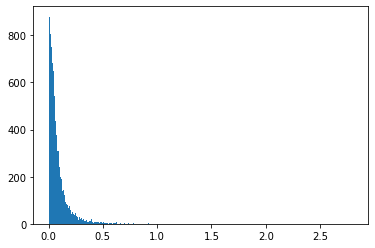

In [25]:
import matplotlib.pyplot as plt
_ = plt.hist(synergy, bins='auto')
plt.show()

In [26]:
np.count_nonzero(synergy<0.2) / synergy.size

0.9178965974370304

In [28]:
np.savetxt('synergy.csv', synergy, delimiter=",")

In [29]:
def percentile_calc(synergy, value):
    return np.count_nonzero(synergy<value) / synergy.size

In [34]:
val = percentile_calc(synergy, 5.60219921e-02)

In [35]:
val

0.5458241272646929

In [32]:
res = run_inference('NC(=O)C1=NC(F)=CN=C1O', 'CCCN1CCN(CC1)C1=CC=C(C=C1)C(=O)NC1(CCCCC1)C(=O)NCC#N')

In [33]:
res

array([[1.90817595e-01, 1.81578800e-01, 2.89967712e-02, 6.71699345e-01,
        1.38607705e-02, 3.74133587e-01, 1.93081155e-01, 1.82827264e-01,
        5.60219921e-02, 2.07367614e-01, 1.36195915e-02, 1.24371387e-01,
        2.07423761e-01, 1.44174159e-01, 9.73016024e-02, 2.71472752e-01,
        1.02986372e-03, 1.30745903e-01, 3.21166039e-01, 2.86165535e-01,
        2.61187583e-01, 1.38212651e-01, 9.53246206e-02, 2.95670629e-01,
        8.25433284e-02, 9.43111420e-01, 1.70055851e-01, 4.06141579e-02,
        2.39656121e-01, 5.23500741e-02, 4.60065976e-02, 2.74457008e-01,
        2.85551455e-02, 1.24397290e+00, 4.84300345e-01, 3.26687902e-01,
        1.12759031e-01, 9.59426090e-02, 3.52802217e-01, 3.60655665e-01,
        8.68446454e-02, 2.30748087e-01, 2.31952086e-01, 1.56698510e-01,
        2.03593776e-01, 1.43838376e-01, 2.03335702e-01, 4.67231703e+00,
        2.00095862e-01, 5.53295479e+01, 1.71278834e-01, 4.60558981e-02,
        1.76707298e-01, 5.21900132e-02, 1.67414868e+00, 3.877496

In [43]:
X1 = np.random.permutation(X_drugs)[0:100]
X2 = np.random.permutation(X_drugs)[0:100]

In [44]:
X1

array(['NC1=NC=NC2=C1N=CN2CCOC[P@@]1(=O)OCC[C@H](O1)C1=CC=CC(Cl)=C1',
       '[H][C@@](O)(CN1C[C@@]([H])(O)[C@]([H])(O)[C@@]1([H])CO)C([H])(CO)OS([O-])([O-])[O-]',
       '[H]N([H])C(=NOCCN([H])C(=O)CC1=C(C=CC(N([H])CC(F)(F)C2=CC=CC=N2)=C1F)C#N)N([H])[H]',
       '[Fe++].[O-]C(=O)CCC([O-])=O',
       '[H][C@]1(CSC(=O)N1)[C@@]1(O)C[C@H]2C[C@@H](CC[C@H](C)\\C=C/C=C/CC\\C(C)=C/C(=O)O2)O1',
       'O=C(NC1=CC=CC=C1)NC1=CC=CC=C1',
       '[H]N([H])C(=NCCCCN([H])C(=O)[C@@H]1C[C@]2([H])CC[C@H](C[C@]2([H])N1C(=O)[C@H](N([H])C(=O)[C@H](O)CC1=CC=C(O)C=C1)[C@H](C)CC)OS(O)(=O)=O)N([H])[H]',
       'NC1=CC=C(C=C1)S(=O)(=O)NC1=CC=CC=N1',
       'CCC(C)N1N=CN(C1=O)C1=CC=C(C=C1)N1CCN(CC1)C1=CC=C(OC[C@H]2CO[C@@](CN3C=NC=N3)(O2)C2=C(Cl)C=C(Cl)C=C2)C=C1',
       '[H]N(C1=CC=C(OC[C@@H](O)CN(C)C)C=C1)C1=NC=CC(=N1)C1=C(C)N=C2C=CC=CN12',
       '[H][C@](O)(C([O-])=NCCC([O-])=NCCSC(=O)C[C@@](C)(O)CC([O-])=O)C(C)(C)COP(O)(=O)OP(O)(=O)OC[C@@]1([H])O[C@@]([H])(N2C=NC3=C(N)N=CN=C23)[C@]([H])(O)[C@]1([H])OP([O-])(

In [47]:
ypred = []
drugs_list = []
for item in range(len(X1)):
    try:
        res = run_inference(X1[item], X2[item])
        ypred.append(res)
        if res[0][8] > 1:
            print([res[0][8], res[0][73]])
            drugs_list.append(item)
    except:
        print('RDKIT issue')

[1.1656772, 11.225731]
[3.4090426, 1.3492002]
[1.0384877, 23.814287]
[2.1518133, 13.148358]
[4.4465165, 0.8343538]
[1.0229648, 23.744429]
[1.7873582, 8.287954]


In [48]:
y8 = []
y_pred = np.array(ypred)
for item in y_pred:
    tmp = np.array(item)
    y8.append(tmp[0][8])

In [49]:
y8

[0.107781254,
 0.05818117,
 0.029556058,
 0.5408272,
 0.46433336,
 0.17463234,
 0.0012926926,
 0.02628036,
 0.04745574,
 0.005315837,
 0.0031944932,
 0.19116437,
 1.1656772,
 0.55479914,
 0.13937072,
 0.01484595,
 0.05509911,
 0.4343175,
 0.016336905,
 0.017033607,
 0.068190075,
 0.5690166,
 0.8936417,
 0.48017097,
 0.10173435,
 0.06634638,
 0.014711565,
 3.4090426,
 0.036154438,
 0.06800499,
 0.61211616,
 1.0384877,
 0.11213043,
 0.08359668,
 0.670779,
 0.13066061,
 0.17020847,
 0.26074484,
 0.9400143,
 0.09888719,
 0.06428083,
 0.18784155,
 2.1518133,
 0.13360125,
 0.15758215,
 0.13345326,
 0.071092844,
 0.037022337,
 0.276806,
 0.011048721,
 0.48706582,
 0.44025305,
 0.9817519,
 0.10558725,
 0.28225368,
 0.07200349,
 0.26762915,
 0.06446556,
 0.15352204,
 0.012142967,
 0.058750488,
 0.04562791,
 0.18862699,
 0.002706702,
 0.104283825,
 0.021797702,
 0.3999089,
 0.08718166,
 0.038571566,
 0.10152027,
 4.4465165,
 0.2600088,
 0.007364656,
 0.26232988,
 0.08756036,
 0.05889624,
 1.0229

In [52]:
percentile = []
for item in y8:
    per = percentile_calc(synergy, item)
    percentile.append(per)

In [89]:
df_test = pd.DataFrame(data = d, columns = ['SMILES1', 'SMILES2', 'DDI', 'Percentile'])

In [88]:
d = {'SMILES1': X1, 'SMILES2': X2, 'DDI': y8, 'Percentile': percentile}

In [90]:
df_test

,SMILES1,SMILES2,DDI,Percentile
0,NC1=NC=NC2=C1N=CN2CCOC[P@@]1(=O)OCC[C@H](O1)C1...,[Cu+].CCC1=C(C)\C2=C\C3=C(CC)C(C)=C(\C=C4/N=C(...,0.107781,0.778789
1,[H][C@@](O)(CN1C[C@@]([H])(O)[C@]([H])(O)[C@@]...,CNCC(O)C1=CC(NS(C)(=O)=O)=CC=C1,0.058181,0.559700
2,[H]N([H])C(=NOCCN([H])C(=O)CC1=C(C=CC(N([H])CC...,N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@@H]1O[C...,0.029556,0.320283
3,[Fe++].[O-]C(=O)CCC([O-])=O,OCC(CO)OP(O)(O)=O,0.540827,0.991074
4,[H][C@]1(CSC(=O)N1)[C@@]1(O)C[C@H]2C[C@@H](CC[...,CC(C)(O)C1=NC=C(N=C1)N1C[C@@]2(CCC[C@](C)(CN3C...,0.464333,0.986390
...,...,...,...,...
95,[H][C@]12OCC[C@@]1([H])[C@H](CO2)OC(=O)N[C@@H]...,CCOC(CN1CCN(CC(C)C(=O)C2=CC=CC=C2)CC1)C1=CC=CC=C1,0.010868,0.117543
96,N[C@@H](CC1=CC=C2C=CC3=C(N=CC=C3)C2=N1)C(O)=O,CC[C@@H](C1=CC(NC(=O)CNC(=O)OC(C)(C)C)=CC=C1)C...,0.929486,0.998498
97,C[C@@H](O)C(O)=O,CCC[C@@H]([C@@H](C1=CNC2=C1C=C(C)C=C2F)C1=CC=C...,0.320635,0.967477
98,OB(O)C1=CC=C(C=C1)C1=CC=C(C=C1)B(O)O,[H]C12CC3([H])CC([H])(C1)CC(C2)(C3)C(=O)CN1C=C...,0.416064,0.981617


In [91]:
df_test.to_csv('examples.csv')